In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
for j in range(12):
    #if j == 0 or j == 1 or j == 2:
        #continue
    start_date = datetime(2015,j+1,10,0,0,0);
    end_date = datetime(2015,j+1,23,0,0,0);
    ms = gps_particle_data.meta_search();
    ms.load_data(start_date,end_date);
    
    output_data = ms.get_all_data_by_satellite()
    signal = 'rate_electron_measured'
    for i in range(11):
        a0 = np.asarray(output_data[59][signal])[:,2]
        ar2 = np.asarray(output_data[59][signal])[:,i]
        #Normalised cross-correlation between channel 2 and all other channels for a given time period.
        cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
        fname = 'ch2_'+str(i)+ '_ns59' +'.ascii'
        with open(fname, 'a') as f:
            np.savetxt(f, cor)
        if i == 2 :
            print 'channel:', i, 'X-cor  --->   ', cor[0]
    
    cont = np.loadtxt('ch2_0_ns59.ascii')
    print cont


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_150111_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_150118_v1.03.ascii
channel: 2 X-cor  --->    1.0
[ 0.9678531   0.84863261  0.74989215  0.9807681   0.94249606  0.95794104
  0.96704126  0.99273406  0.91550603  0.96387647  0.95359087  0.9637998
  0.88056095  0.97242887  0.92779985  0.98559836  0.95946023  0.97083726
  0.88103801  0.9377866   0.80765974  0.85708274  0.94387503  0.90644264
  0.99607865  0.95391115  0.95249     0.92033953  0.94758998  0.91264097
  0.95301717  0.94277828  0.85257058  0.92176647  0.81903894  0.96692846
  0.93495095  0.88703262  0.96801012  0.84998985  0.88638458  0.92284497
  0.90014043  0.9476281   0.9420434   0.96413257  0.83522598  0.87026545
  0.92524906  0.90417777  0.81620179  0.87283542  0.87190214  0.61969221
  0.77065904  0.25324721  0.81885054  


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_150614_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_150621_v1.03.ascii
channel: 2 X-cor  --->    1.0
[ 0.9678531   0.84863261  0.74989215  0.9807681   0.94249606  0.95794104
  0.96704126  0.99273406  0.91550603  0.96387647  0.95359087  0.9637998
  0.88056095  0.97242887  0.92779985  0.98559836  0.95946023  0.97083726
  0.88103801  0.9377866   0.80765974  0.85708274  0.94387503  0.90644264
  0.99607865  0.95391115  0.95249     0.92033953  0.94758998  0.91264097
  0.95301717  0.94277828  0.85257058  0.92176647  0.81903894  0.96692846
  0.93495095  0.88703262  0.96801012  0.84998985  0.88638458  0.92284497
  0.90014043  0.9476281   0.9420434   0.96413257  0.83522598  0.87026545
  0.92524906  0.90417777  0.81620179  0.87283542  0.87190214  0.61969221
  0.77065904  0.25324721  0.81885054  


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_151115_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_151122_v1.03.ascii
channel: 2 X-cor  --->    1.0
[ 0.9678531   0.84863261  0.74989215  0.9807681   0.94249606  0.95794104
  0.96704126  0.99273406  0.91550603  0.96387647  0.95359087  0.9637998
  0.88056095  0.97242887  0.92779985  0.98559836  0.95946023  0.97083726
  0.88103801  0.9377866   0.80765974  0.85708274  0.94387503  0.90644264
  0.99607865  0.95391115  0.95249     0.92033953  0.94758998  0.91264097
  0.95301717  0.94277828  0.85257058  0.92176647  0.81903894  0.96692846
  0.93495095  0.88703262  0.96801012  0.84998985  0.88638458  0.92284497
  0.90014043  0.9476281   0.9420434   0.96413257  0.83522598  0.87026545
  0.92524906  0.90417777  0.81620179  0.87283542  0.87190214  0.61969221
  0.77065904  0.25324721  0.81885054  

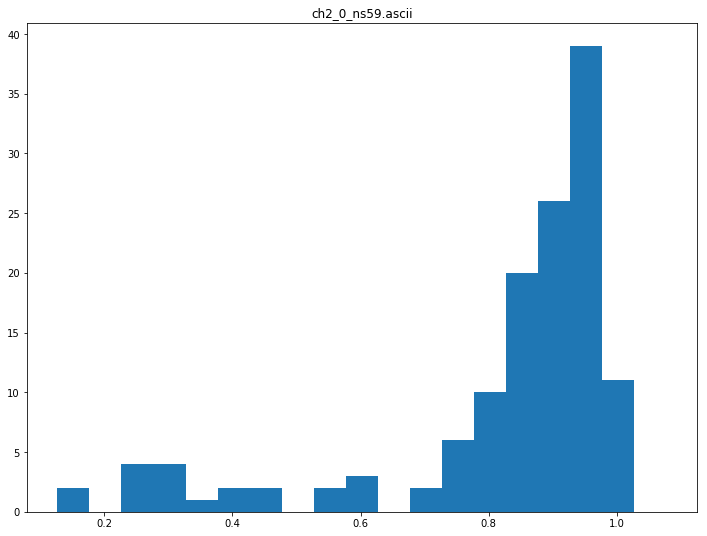

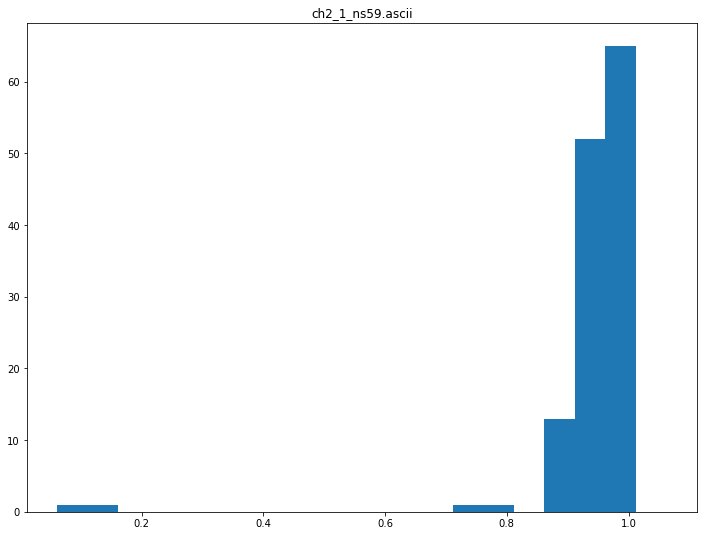

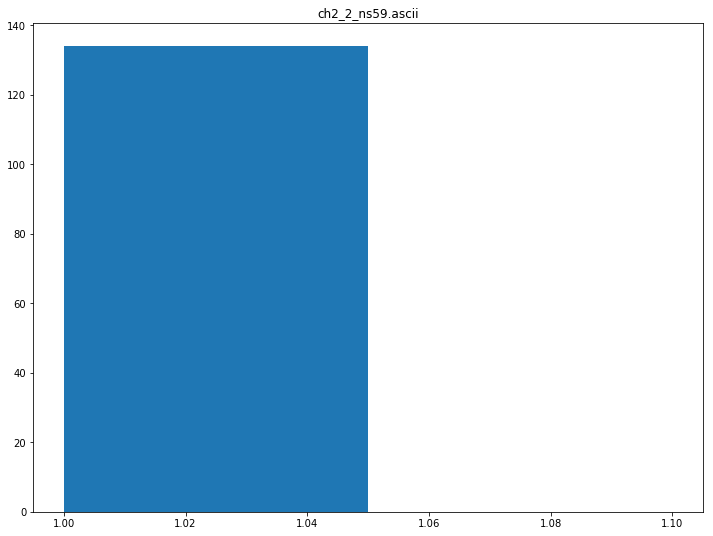

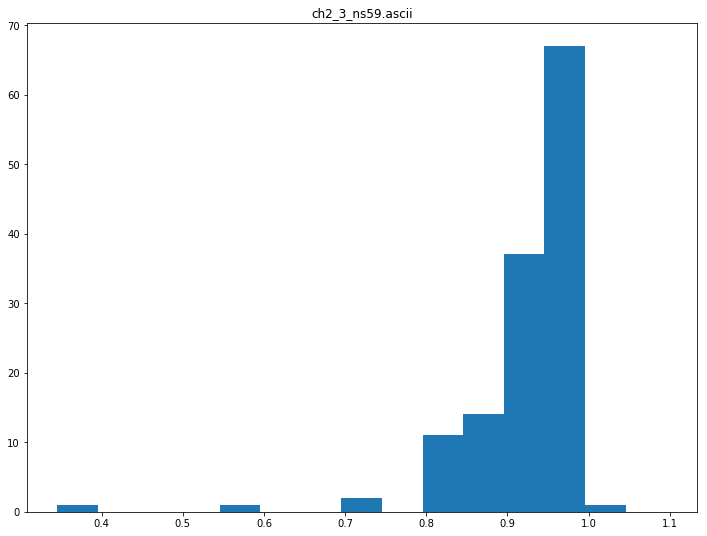

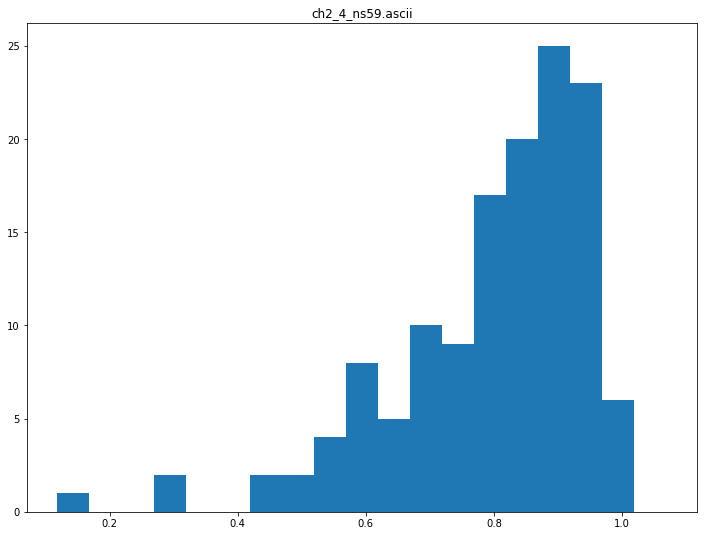

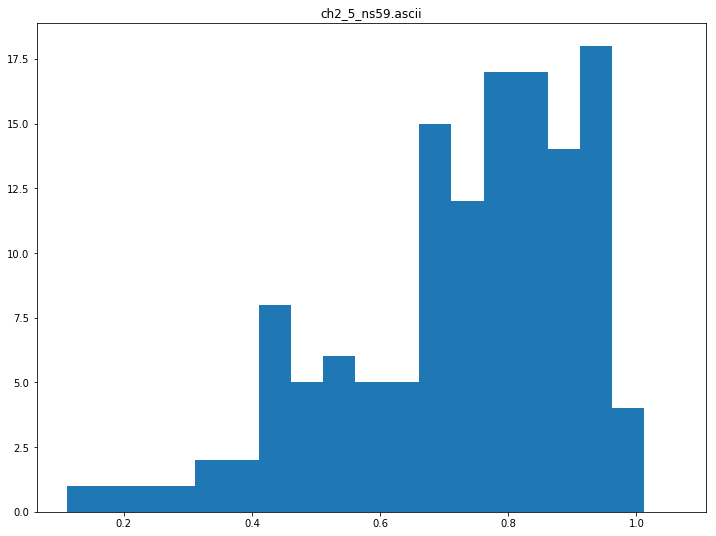

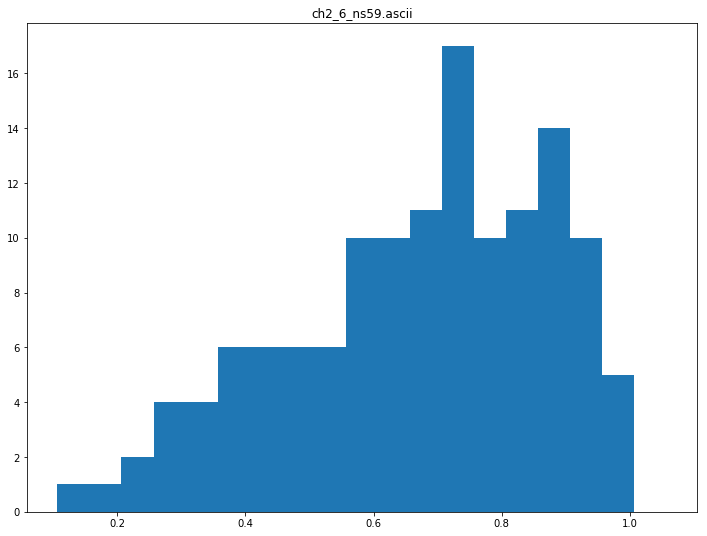

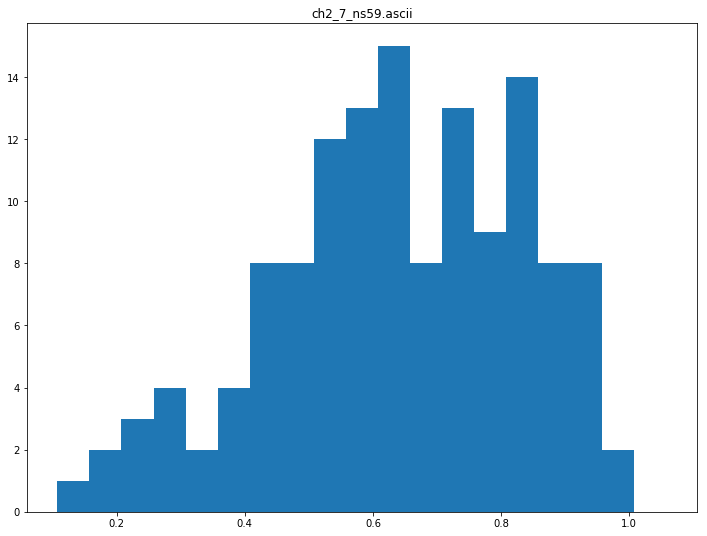

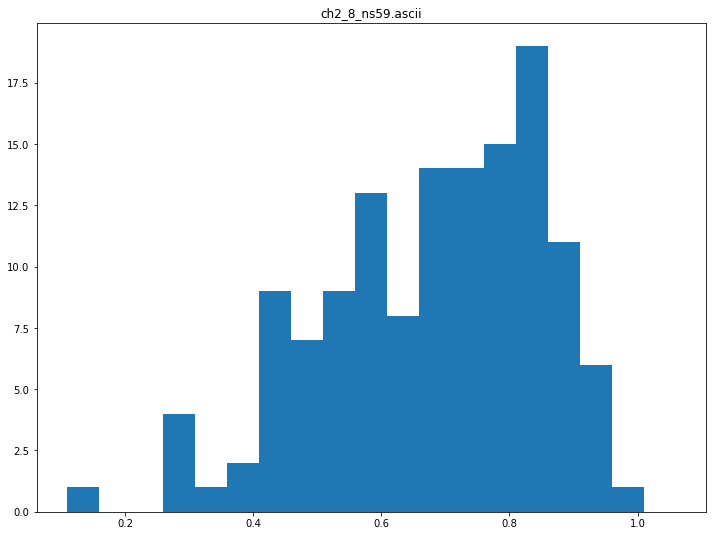

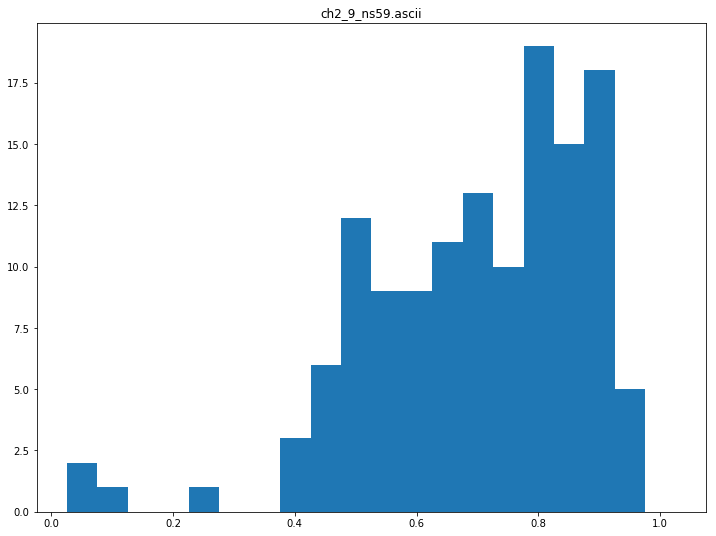

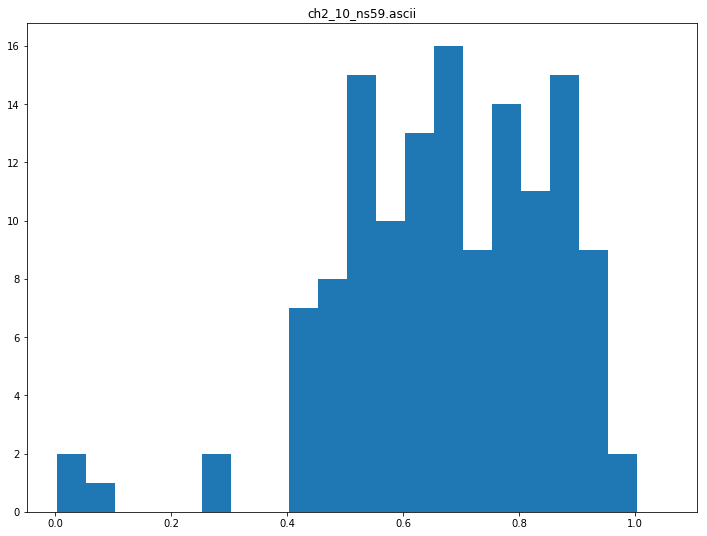

In [15]:
for i in range(11):
    fname = 'ch2_'+str(i)+'_ns59.ascii'
    fig = plt.figure(figsize=(12, 9))
    cor = np.loadtxt(fname)
    plt.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    plt.title(fname)
    plt.show()

In [16]:
#Test 9th Oct 2006

start_date = datetime(2006,10,8,0,0,0);
end_date = datetime(2006,10,9,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_061008_v1.03.ascii


In [17]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.87305073]), 1: array([ 0.94204532]), 2: array([ 1.]), 3: array([ 0.80692966]), 4: array([ 0.56820298]), 5: array([ 0.50170034]), 6: array([ 0.44089433]), 7: array([ 0.41378245]), 8: array([ 0.56745853]), 9: array([ 0.56006684]), 10: array([ 0.51876534])}


In [18]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'_ns59.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0_ns59.ascii [ 0.87305073] 0.43
ch2_1_ns59.ascii [ 0.94204532] 0.51
ch2_2_ns59.ascii [ 1.] 1.00
ch2_3_ns59.ascii [ 0.80692966] 0.11
ch2_4_ns59.ascii [ 0.56820298] 0.08
ch2_5_ns59.ascii [ 0.50170034] 0.16
ch2_6_ns59.ascii [ 0.44089433] 0.18
ch2_7_ns59.ascii [ 0.41378245] 0.18
ch2_8_ns59.ascii [ 0.56745853] 0.34
ch2_9_ns59.ascii [ 0.56006684] 0.25
ch2_10_ns59.ascii [ 0.51876534] 0.26


In [19]:
#Test 25th May 2009

start_date = datetime(2009,5,20,0,0,0);
end_date = datetime(2009,5,26,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_090524_v1.03.ascii


In [20]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.66382697]), 1: array([ 0.78089147]), 2: array([ 1.]), 3: array([ 0.94055335]), 4: array([ 0.90642332]), 5: array([ 0.79882213]), 6: array([ 0.79120794]), 7: array([ 0.86152105]), 8: array([ 0.85661073]), 9: array([ 0.85717284]), 10: array([ 0.85484458])}


In [21]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'_ns59.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0_ns59.ascii [ 0.66382697] 0.15
ch2_1_ns59.ascii [ 0.78089147] 0.03
ch2_2_ns59.ascii [ 1.] 1.00
ch2_3_ns59.ascii [ 0.94055335] 0.49
ch2_4_ns59.ascii [ 0.90642332] 0.78
ch2_5_ns59.ascii [ 0.79882213] 0.60
ch2_6_ns59.ascii [ 0.79120794] 0.70
ch2_7_ns59.ascii [ 0.86152105] 0.93
ch2_8_ns59.ascii [ 0.85661073] 0.87
ch2_9_ns59.ascii [ 0.85717284] 0.83
ch2_10_ns59.ascii [ 0.85484458] 0.92


In [22]:
#Test 12th Feb 2013

start_date = datetime(2013,2,9,0,0,0);
end_date = datetime(2013,2,13,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_130210_v1.03.ascii


In [23]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.68037488]), 1: array([ 0.97176753]), 2: array([ 1.]), 3: array([ 0.94877036]), 4: array([ 0.57530281]), 5: array([ 0.3996414]), 6: array([ 0.27240629]), 7: array([ 0.22391387]), 8: array([ 0.25821964]), 9: array([ 0.35042389]), 10: array([ 0.42720971])}


In [24]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'_ns59.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0_ns59.ascii [ 0.68037488] 0.16
ch2_1_ns59.ascii [ 0.97176753] 1.00
ch2_2_ns59.ascii [ 1.] 1.00
ch2_3_ns59.ascii [ 0.94877036] 0.99
ch2_4_ns59.ascii [ 0.57530281] 0.14
ch2_5_ns59.ascii [ 0.3996414] 0.06
ch2_6_ns59.ascii [ 0.27240629] 0.06
ch2_7_ns59.ascii [ 0.22391387] 0.04
ch2_8_ns59.ascii [ 0.25821964] 0.01
ch2_9_ns59.ascii [ 0.35042389] 0.03
ch2_10_ns59.ascii [ 0.42720971] 0.09


In [25]:
#Test 6th Jan 2016

start_date = datetime(2016,1,2,0,0,0);
end_date = datetime(2016,1,7,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date)


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_160103_v1.03.ascii


In [26]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.99230772]), 1: array([ 0.99716444]), 2: array([ 1.]), 3: array([ 0.98769164]), 4: array([ 0.96434415]), 5: array([ 0.95040146]), 6: array([ 0.93425413]), 7: array([ 0.91712068]), 8: array([ 0.92258785]), 9: array([ 0.93824642]), 10: array([ 0.93892139])}


In [27]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'_ns59.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0_ns59.ascii [ 0.99230772] 1.00
ch2_1_ns59.ascii [ 0.99716444] 1.00
ch2_2_ns59.ascii [ 1.] 1.00
ch2_3_ns59.ascii [ 0.98769164] 0.99
ch2_4_ns59.ascii [ 0.96434415] 0.96
ch2_5_ns59.ascii [ 0.95040146] 0.97
ch2_6_ns59.ascii [ 0.93425413] 0.96
ch2_7_ns59.ascii [ 0.91712068] 0.99
ch2_8_ns59.ascii [ 0.92258785] 0.99
ch2_9_ns59.ascii [ 0.93824642] 1.00
ch2_10_ns59.ascii [ 0.93892139] 0.99


In [28]:
#Test 9th Sept 2016

start_date = datetime(2016,9,4,0,0,0);
end_date = datetime(2016,9,10,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date)


Loading data for satellite  59
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns59/ns59_160904_v1.03.ascii


In [29]:
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[59][signal])[:,2]
    ar2 = np.asarray(output_data[59][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor

{0: array([ 0.9956878]), 1: array([ 0.99864357]), 2: array([ 1.]), 3: array([ 0.99565808]), 4: array([ 0.97472231]), 5: array([ 0.95996842]), 6: array([ 0.93342207]), 7: array([ 0.89494962]), 8: array([ 0.88238411]), 9: array([ 0.92340654]), 10: array([ 0.92497085])}


In [30]:
xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'_ns59.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)

ch2_0_ns59.ascii [ 0.9956878] 1.00
ch2_1_ns59.ascii [ 0.99864357] 1.00
ch2_2_ns59.ascii [ 1.] 1.00
ch2_3_ns59.ascii [ 0.99565808] 1.00
ch2_4_ns59.ascii [ 0.97472231] 1.00
ch2_5_ns59.ascii [ 0.95996842] 0.97
ch2_6_ns59.ascii [ 0.93342207] 0.96
ch2_7_ns59.ascii [ 0.89494962] 0.93
ch2_8_ns59.ascii [ 0.88238411] 0.95
ch2_9_ns59.ascii [ 0.92340654] 0.96
ch2_10_ns59.ascii [ 0.92497085] 0.99
